In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_train = pd.read_feather('./train_removed_corr.feather')
df_val = pd.read_feather('./val_removed_corr.feather') 

df_X_train = df_train.drop(columns = ['playMin_diff'])
y_train = df_train.playMin_diff

df_X_val = df_val.drop(columns = ['playMin_diff'])
y_val = df_val.playMin_diff

rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)
rfr.score(df_X_val, y_val)

0.7828007720105368

In [8]:
import eli5
from eli5.sklearn import PermutationImportance
pmi_limited = PermutationImportance(rfr).fit(df_X_val, y_val)

In [10]:
eli5.explain_weights_df(pmi_limited, feature_names = df_X_val.columns.to_list())

,feature,weight,std
0,playFGA_diff,0.561680,0.004228
1,playTRB_diff,0.291852,0.004015
2,playAST_diff,0.207756,0.001992
3,playPF_diff,0.161611,0.001136
4,playFG%_diff,0.142494,0.001115
5,playFT%_diff,0.118898,0.000491
6,playSTL_diff,0.090179,0.001888
7,play3P%_diff,0.079019,0.000887
8,playBLK_diff,0.073281,0.001018
9,IsStarter_diff,0.066548,0.001882


In [29]:
from plotnine import *
sampled_train = df_train.sample(n=3000, random_state=1)

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

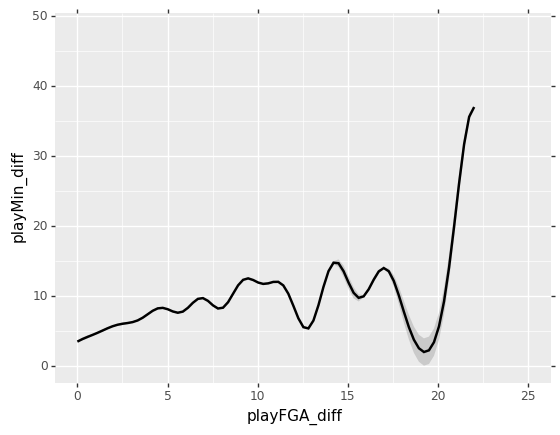

<ggplot: (7020825506)>

In [14]:
(ggplot(sampled_train, aes('playFGA_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 25) + ylim(0, 48))

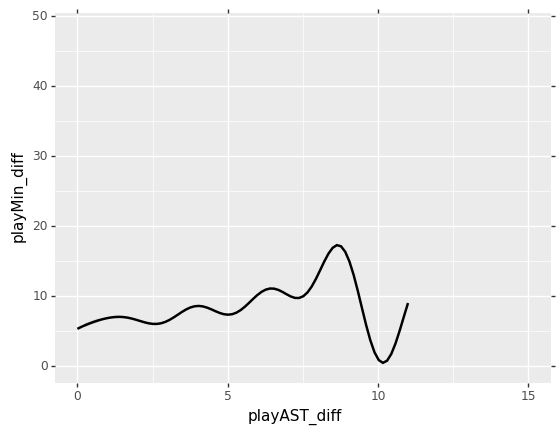

<ggplot: (7022306452)>

In [16]:
(ggplot(sampled_train, aes('playAST_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 15) + ylim(0, 48))

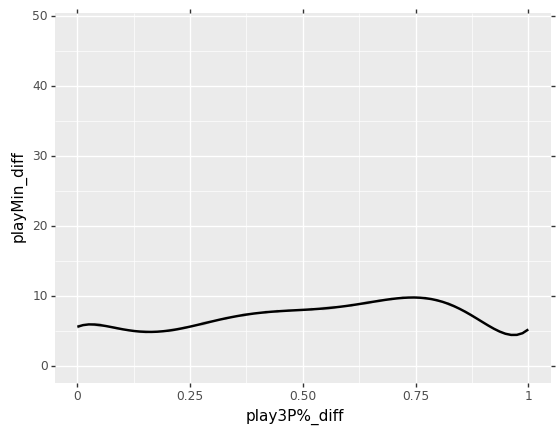

<ggplot: (7640361792)>

In [18]:
(ggplot(sampled_train, aes('play3P%_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 1) + ylim(0, 48))

In [19]:
df_X_val.head()

,playAST_diff,playSTL_diff,playBLK_diff,playPF_diff,playFGA_diff,playTRB_diff,playFG%_diff,play3P%_diff,playFT%_diff,IsStarter_diff
0,2.0,-1.0,1.0,0.0,6.0,-2.0,0.3091,0.0,-0.3333,0.0
1,0.0,1.0,1.0,3.0,2.0,0.0,0.6000,0.5,0.0000,0.0
2,0.0,0.0,1.0,0.0,1.0,-1.0,1.0000,1.0,0.0000,0.0
3,0.0,0.0,-1.0,1.0,-3.0,-3.0,-0.1000,0.0,0.5000,0.0
4,0.0,1.0,0.0,2.0,2.0,3.0,0.3333,0.0,0.5000,0.0


In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
from pdpbox.pdp import pdp_plot, pdp_isolate
import pdpbox
def plot_pdp(model, X, feature_names, feature, clusters = None):
    iso = pdp_isolate(rfr, df_X_train, df_X_train.columns, feature)
    return pdp_plot(iso, feature, plot_lines = True, cluster=clusters, n_cluster_centers=clusters)

CPU times: user 28min 22s, sys: 7min 30s, total: 35min 53s
Wall time: 28min 51s


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c8c9940b8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ccd792ba8>})

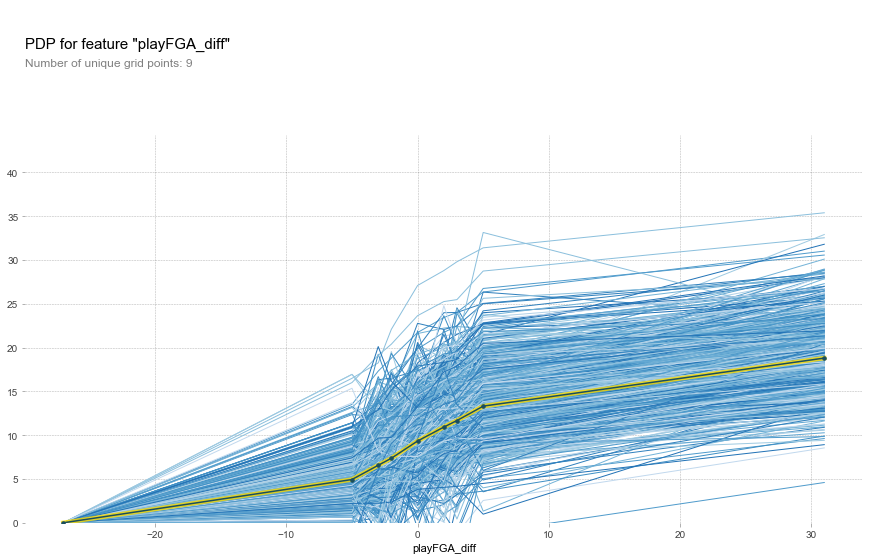

In [27]:
%%time
plot_pdp(rfr, df_X_train.sample(2000), df_X_train.columns, 'playFGA_diff', 1000)

CPU times: user 28.2 s, sys: 1.62 s, total: 29.9 s
Wall time: 25.5 s


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c96855550>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c9687ecf8>})

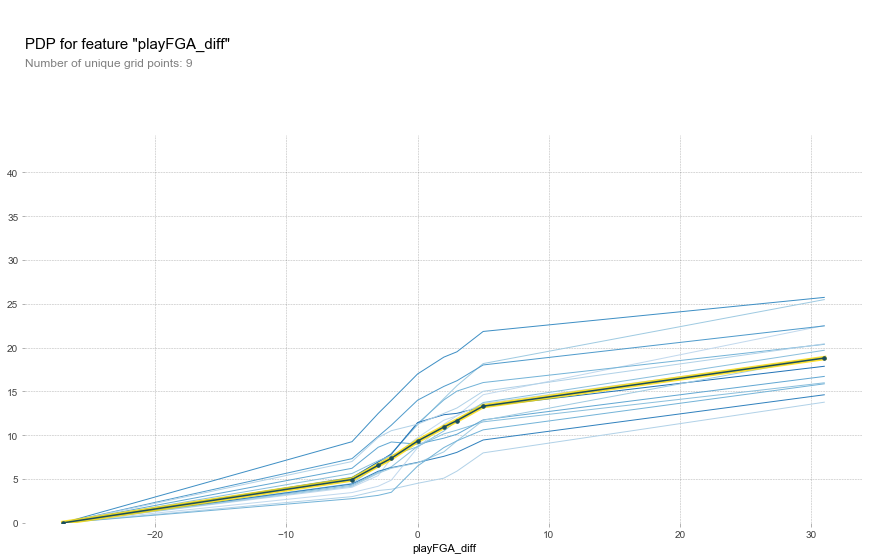

In [23]:
%%time
plot_pdp(rfr, df_X_train.sample(2000), df_X_train.columns, 'playFGA_diff', 15)